In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
# Styles 
%matplotlib inline
sns.set()  # for plot styling
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
pd.set_option('display.width', 2000)


In [3]:
os.chdir('C:\\Sohan\\ML_Acmegrade\\ML Day13 5\\')
data = pd.read_csv('movie_metadata.csv')
data


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660


In [4]:
print (data.shape)
print (data.groupby('country').size())
print ('\n')
print (data.groupby('language').size())
data[['director_name','director_facebook_likes']]
data.columns


(5043, 28)
country
49                         5
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
                        ... 
Turkey                     1
UK                       448
USA                     3807
United Arab Emirates       1
West Germany               3
Length: 66, dtype: int64


language
49              12
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4704
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        18
Kannada          1
Kazakh           1
Korean           8
Mandarin        26
Maya             1
Mongolian        1
None             2
Norwegian        4
Panjabi          1

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes'], dtype='object')

In [5]:
newdata=data.iloc[:,4:6]
newdata


,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(newdata)


KMeans(n_clusters=5)

In [8]:
kmeans.cluster_centers_
print (kmeans.labels_)
cluster = pd.concat([data,pd.DataFrame(kmeans.labels_)],axis=1)
print (len(kmeans.labels_))
cluster.to_excel ('C:\\Sohan\\ML_Acmegrade\\ML Day13 5\\moviecluster.xlsx')
print (cluster)


[0 0 0 ... 0 0 0]
5043
      color      director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes      actor_2_name  actor_1_facebook_likes      gross                           genres  ... language country  content_rating     budget title_year  actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  0
0     Color      James Cameron                     723       178                        0                     855  Joel David Moore                    1000  760505847  Action|Adventure|Fantasy|Sci-Fi  ...  English     USA           PG-13  237000000       2009                     936        7.9         1.78                 33000  0
1     Color     Gore Verbinski                     302       169                      563                    1000     Orlando Bloom                   40000  309404152         Action|Adventure|Fantasy  ...  English     USA           PG-13  300000000       2007                    5000        7.1         2.35    

In [9]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))


<class 'numpy.ndarray'>
{0: 4775, 1: 68, 2: 87, 3: 11, 4: 102}


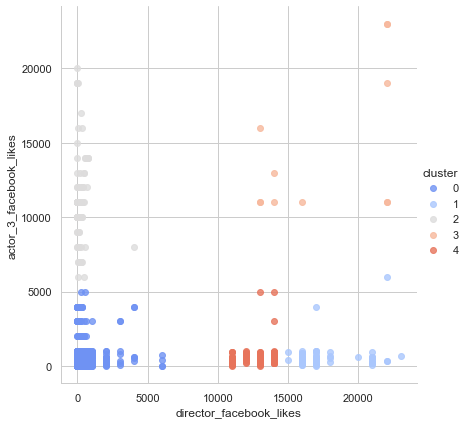

In [10]:
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)
